# Assignment 9
### Objective:
1. Consider 6A Code, and apply gradCAM. As proof of integration, test 4 images (remember the image ids or names) from your network and show the visualization.
2. Train 6A Code again and add CutOut. Show the same 4 images again with gradCAM's result.


### Import Libraries

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


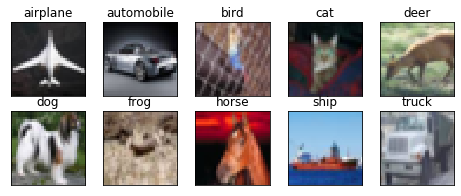

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model

model = Sequential()

model.add(Convolution2D(64, (3, 3), border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))



model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 2))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-pac

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 128)      

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`




Epoch 1/100
390/390 [==============================] - 21s 54ms/step - loss: 1.5050 - acc: 0.4609 - val_loss: 1.3984 - val_acc: 0.5269

Epoch 00001: val_acc improved from -inf to 0.52690, saving model to model.hdf5
Epoch 2/100
390/390 [==============================] - 14s 37ms/step - loss: 0.9683 - acc: 0.6549 - val_loss: 1.0143 - val_acc: 0.6585

Epoch 00002: val_acc improved from 0.52690 to 0.65850, saving model to model.hdf5
Epoch 3/100
390/390 [==============================] - 14s 37ms/step - loss: 0.7635 - acc: 0.7340 - val_loss: 0.9358 - val_acc: 0.6929

Epoch 00003: val_acc improved from 0.65850 to 0.69290, saving model to model.hdf5
Epoch 4/100
390/390 [==============================] - 14s 37ms/step - loss: 0.6560 - acc: 0.7710 - val_loss: 0.8121 - val_acc: 0.7290

Epoch 00004: val_acc improved from 0.69290 to 0.72900, saving model to model.hdf5
Epoch 5/100
390/390 [==============================] - 14s 37ms/step - loss: 0.5766 - acc: 0.7991 - val_loss: 0.7003 - val_acc: 0

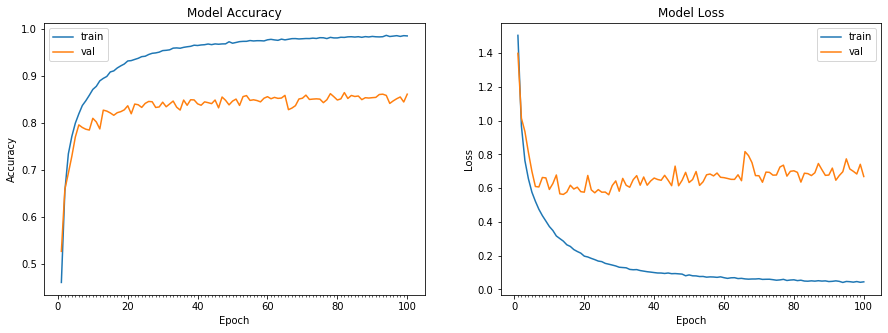

Accuracy on test data is: 86.07


In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# checkpoint for saving model with best accuracy
checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## 9A: GradCAM integration

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [0]:
def min_max_scale(X):
  return (X - np.min(X))/(np.max(X)-np.min(X))

class MakeIter(object):
    def __init__(self, *args, **kwargs):
        self.generator_func = args[0]
        self.kwargs = kwargs
        self.args = args[2:]
        self.length = args[1]
        self.iter = self.generator_func(*self.args,**self.kwargs)
        
        
    def __iter__(self):
        return self.iter
        
    def __len__(self): 
        return self.length
    def __next__(self):
        return next(self.iter)
        
    def next(self):
        return next(self.iter)

In [0]:
# https://stackoverflow.com/questions/34643747/ipython-notebook-jupyter-opencv-cv2-and-plotting/48738145#48738145
# https://stackoverflow.com/questions/34933905/matplotlib-adding-subplots-to-a-subplot
def gradcam(model,layer,img,normalized_input=True,show=False):
  if not normalized_input:
    img = img/255
  x = np.expand_dims(img, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layer)
  layer_out_channels = last_conv_layer.output_shape[-1]
  
  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(layer_out_channels):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  heatmap = heatmap/255
  
#   superimposed_img = cv2.addWeighted(img, 0.75, heatmap, 0.25, 0)
  superimposed_img = 0.7*(img) + 0.3*heatmap
  superimposed_img = superimposed_img
  if show:
    plt.imshow(img)
    plt.show()
    plt.imshow(heatmap)
    plt.show()
    plt.imshow(superimposed_img)
    plt.show()
  return img,heatmap,superimposed_img

# _ = gradcam(model,"output_transition",X_e[0],show=True)

def show_examples_with_gradcam(model,layer,X,Y,classes,image_size_multiplier=2):
  Y = np.argmax(Y, axis=1)
  columns = 5
  rows = int(np.ceil(len(X) / columns))
  
  fig_height = rows * image_size_multiplier * 3
  fig_width = columns * image_size_multiplier
  fig = plt.figure(figsize=(fig_width, fig_height))
  outer = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.2)
  for i in range(rows*columns):
    if i>=len(X):
      break
    x = X[i]
    y = Y[i]
    img,heatmap,superimposed_img = gradcam(model,layer,x,show=False)
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.0, hspace=0.15)
    imgs = [img,heatmap,superimposed_img]
    titles = ["Image: "+classes[y],"HeatMap","SuperImposed Image"]
    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        ax.imshow(imgs[j])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[j])
        fig.add_subplot(ax)
  
  fig.show()   
  

In [0]:
datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,)
_ = datagen.fit(train_features)
train_iterator = datagen.flow(train_features, train_labels, batch_size=100,shuffle=False)

X_e, Y_e = train_iterator.next()
X_e = min_max_scale(X_e)





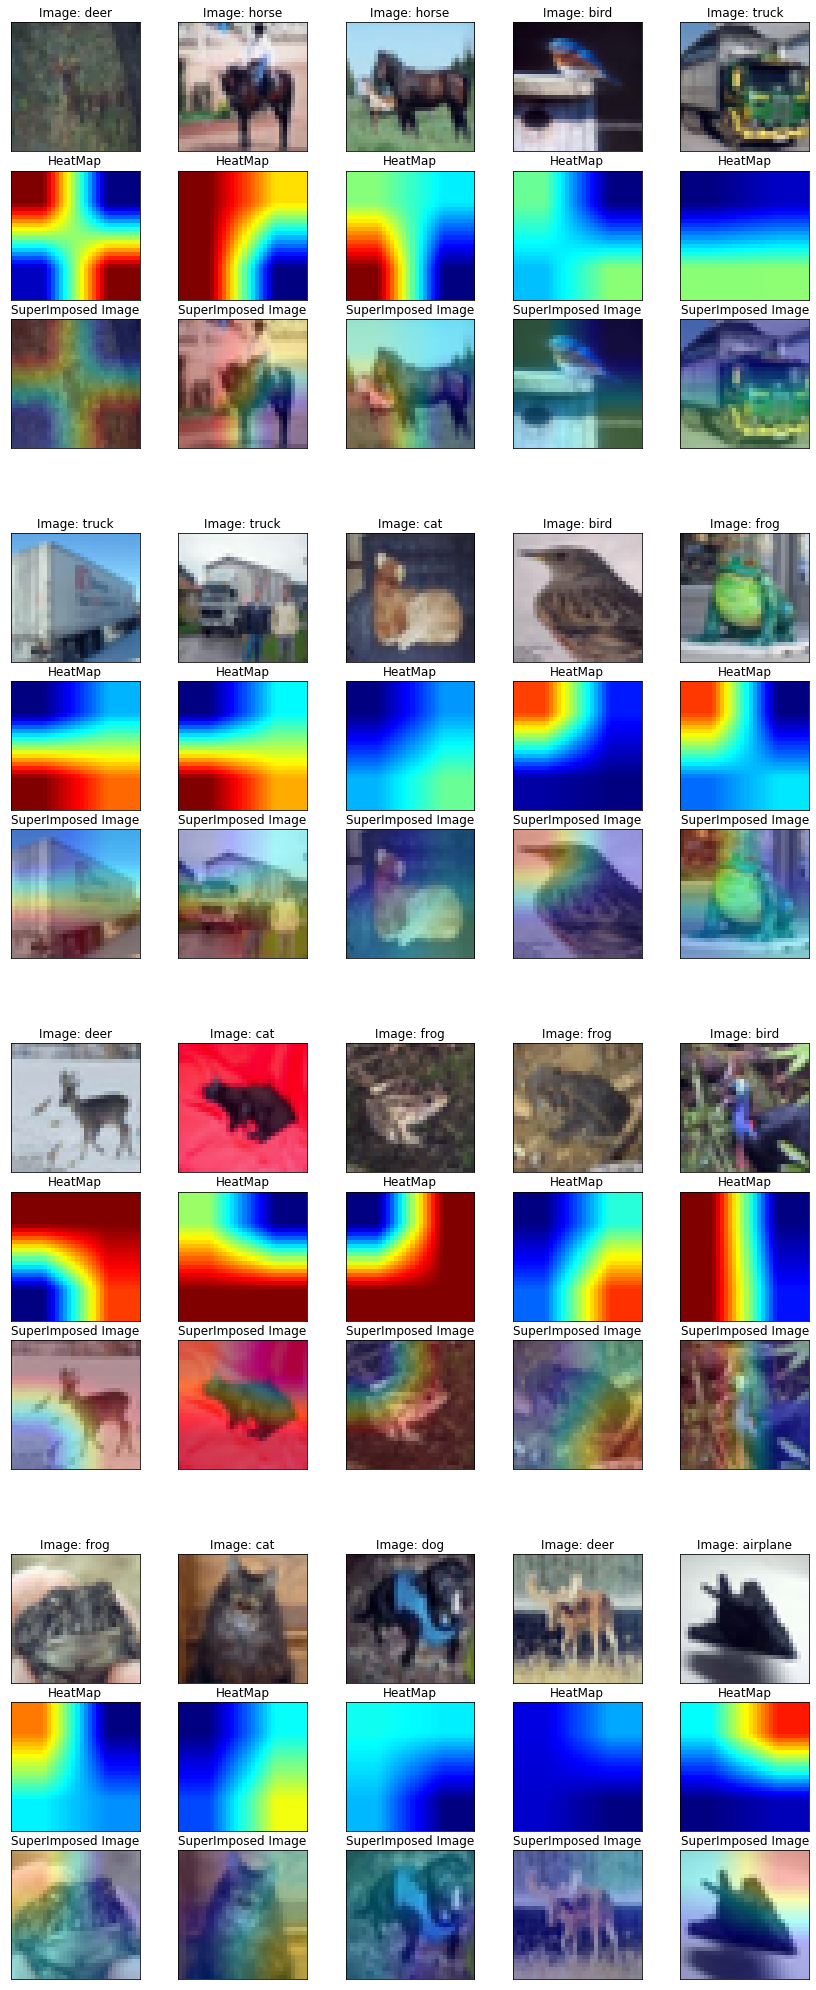

In [13]:
import matplotlib.gridspec as gridspec
show_examples_with_gradcam(model,"conv2d_14",X_e[10:30], Y_e[10:30],class_names,image_size_multiplier=3)

## 9B: Cut out Integration

In [0]:
def get_cutout_eraser(p=0.5, s_l=0.05, s_h=0.3, r_1=0.3, r_2=1 / 0.3, max_erasures_per_image=1, pixel_level=True):
  
    """
    :param p:
    :param s_l: Minimum Area Proportion of Original that may be cut
    :param s_h: Maximum Area Proportion of Original that may be cut
    :param r_1: Min Aspect Ratio
    :param r_2: Max Aspect Ratio
    :param max_erasures_per_image:
    :param pixel_level:
    :return: Eraser to be used as Preprocessing Function
    """
    assert max_erasures_per_image >= 1

    def eraser(input_img):
        v_l = np.min(input_img)
        v_h = np.max(input_img)
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        mx = np.random.randint(1, max_erasures_per_image + 1)
        # print("Erasures = ",mx,end =", ")
        for i in range(mx):
            while True:
                s = np.random.uniform(s_l, s_h) * img_h * img_w
                r = np.random.uniform(r_1, r_2)
                w = int(np.sqrt(s / r))
                h = int(np.sqrt(s * r))
                left = np.random.randint(0, img_w)
                top = np.random.randint(0, img_h)

                if left + w <= img_w and top + h <= img_h:
                    break

            # print("W = ",w,"H = ",h,end =", ")

            if pixel_level:
                # print(np.max(img_c),np.min(img_c),v_l,v_h)
                c = np.random.uniform(v_l, v_h, (h, w, img_c))
                # print(c.shape,np.min(c),np.max(c),np.median(c))
            else:
                c = np.random.uniform(v_l, v_h)

            input_img[top:top + h, left:left + w, :] = c

        # print()
        return input_img

    return eraser

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=100)`


Epoch 1/100
390/390 [==============================] - 17s 44ms/step - loss: 2.9584 - acc: 0.0999 - val_loss: 2.3033 - val_acc: 0.1000

Epoch 00001: val_acc improved from -inf to 0.10000, saving model to model.hdf5
Epoch 2/100
390/390 [==============================] - 15s 38ms/step - loss: 2.3434 - acc: 0.0998 - val_loss: 2.3032 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.10000
Epoch 3/100
390/390 [==============================] - 15s 37ms/step - loss: 2.3254 - acc: 0.1000 - val_loss: 2.3037 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.10000
Epoch 4/100
390/390 [==============================] - 15s 37ms/step - loss: 2.3184 - acc: 0.0983 - val_loss: 2.3031 - val_acc: 0.1000

Epoch 00004: val_acc did not improve from 0.10000
Epoch 5/100
390/390 [==============================] - 15s 38ms/step - loss: 2.3152 - acc: 0.0997 - val_loss: 2.3031 - val_acc: 0.1000

Epoch 00005: val_acc did not improve from 0.10000
Epoch 6/100
390/390 [====================

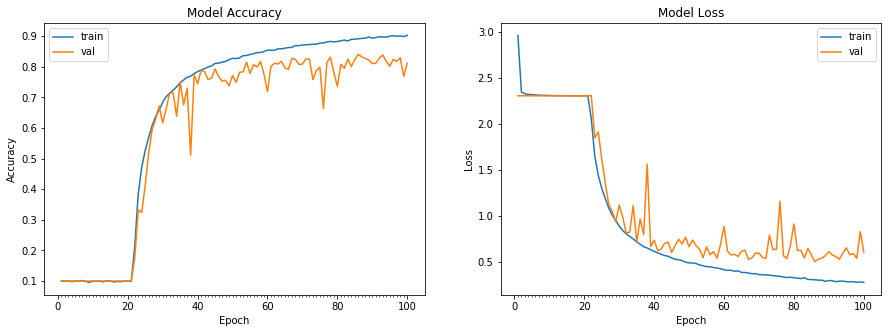

Accuracy on test data is: 81.21


In [16]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
#from random_eraser import get_random_eraser

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# checkpoint for saving model with best accuracy
checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#datagen = ImageDataGenerator(zoom_range=0.0, 
#                             horizontal_flip=False,
#                            preprocessing_function=get_cutout_eraser(p=0.75, s_l=0.05, s_h=0.2, r_1=0.3, r_2=1 / 0.3, max_erasures_per_image=3, pixel_level=True))

datagen = ImageDataGenerator(zoom_range = 0.0,
                            horizontal_flip=False,
                            preprocessing_function=get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,
                  v_l=0, v_h=255, pixel_level=False))
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks = callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

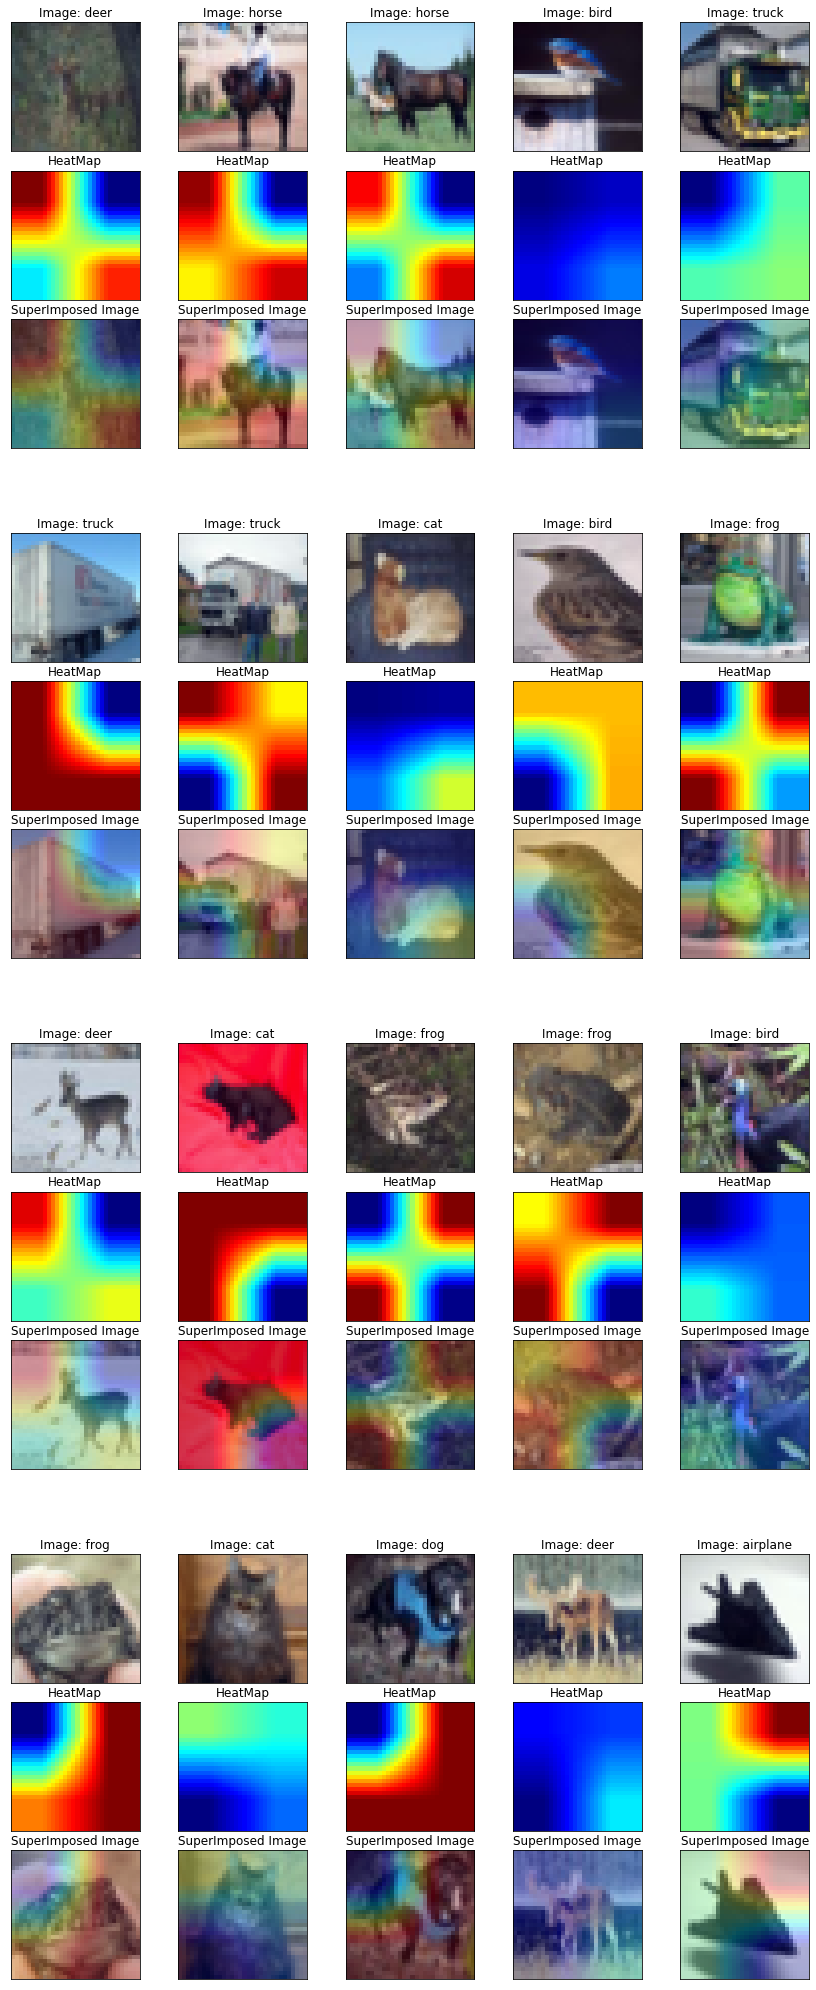

In [17]:
show_examples_with_gradcam(model,"conv2d_14",X_e[10:30], Y_e[10:30],class_names,image_size_multiplier=3)